In [195]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_singlenode
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'
fs_=16
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc('xtick', labelsize=fs_) 
matplotlib.rc('ytick', labelsize=fs_) 
plt.rc('legend',fontsize=fs_)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 600.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]
input = zero_control.copy()

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()
target = np.concatenate((np.concatenate( (wc.params["exc_init"], wc.params["inh_init"]), axis=1)[:,:, np.newaxis], np.stack( (wc.exc, wc.inh), axis=1)), axis=2)

peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
period = (peaks[-1] - peaks[-2])*dt
print("period = ", period)

period =  18.900000000000002


In [197]:
control_mat = np.zeros( (wc.params.N, len(wc.state_vars)) )
control_mat[0,0] = 1.
control_mat[0,1] = 1.

prec_mat = np.zeros( (wc.params.N, len(wc.output_vars)) )
prec_mat[0,0] = 1.
prec_mat[0,1] = 1.

int0, int1 = 1500, None
duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]

wc.params["duration"] = duration
wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

In [198]:
def plot_single(time, state, control, target, filename):

    fig, ax = plt.subplots(2,1)

    ax[0].plot(time, state[0,0,1:], color="red")
    ax[0].plot(time, state[0,1,1:], color="blue")
    ax[0].plot(time, target[0,0,1:], color="red", linestyle=':')
    ax[0].plot(time, target[0,1,1:], color="blue", linestyle=':')
    ax[0].set_xlim(0,300)

    ax[1].plot(time, control[0,0,1:], color="red")
    ax[1].plot(time, control[0,1,1:], color="blue")
    ax[1].set_xlim(0,300)

    if type(filename) != type(None):
        plt.savefig(filename)
    plt.show()

In [199]:
savepath = '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images' + os.sep

def plot(c_array, filename):

    fig, ax = plt.subplots(len(c_array),1, figsize=(10,24))

    for i in range(len(c_array)):
        ax[i].plot(wc_controlled.model.t, c_array[i][0,0,1:], color="red")
        ax[i].plot(wc_controlled.model.t, c_array[i][0,1,1:], color="blue")
        ax[i].set_ylim([-0.3,0.3])
        ax[i].set_title(str(np.round(i*2./(len(c_array)-1), 2))+ " * pi")
        if i != len(c_array)-1:
            ax[i].set_xticklabels([])

    plt.savefig(os.path.join(savepath, filename))
    plt.show()

target shift in ms =  3.7800000000000007
-------------------- no input --------------------
Compute control for a deterministic system
Cost in iteration 0: 2.3230079801886268
Final cost : 2.3230079801886268
-------------------- self-designed input --------------------
Compute control for a deterministic system
Cost in iteration 0: 0.5019602487095373
Final cost : 0.49188858932987095
Compute control for a deterministic system
Cost in iteration 0: 0.49188858932987095
Final cost : 0.06640783271180413
Compute control for a deterministic system
Cost in iteration 0: 0.06640783271180413
Cost in iteration 200: 0.007147270856835952
Cost in iteration 400: 0.003900784894832521
Converged in iteration 524 with cost 0.0037117187329937843
Final cost : 0.0037117187329937843
Compute control for a deterministic system
Cost in iteration 0: 0.0037117187329937843
Converged in iteration 2 with cost 0.0037117187329937843
Final cost : 0.0037117187329937843


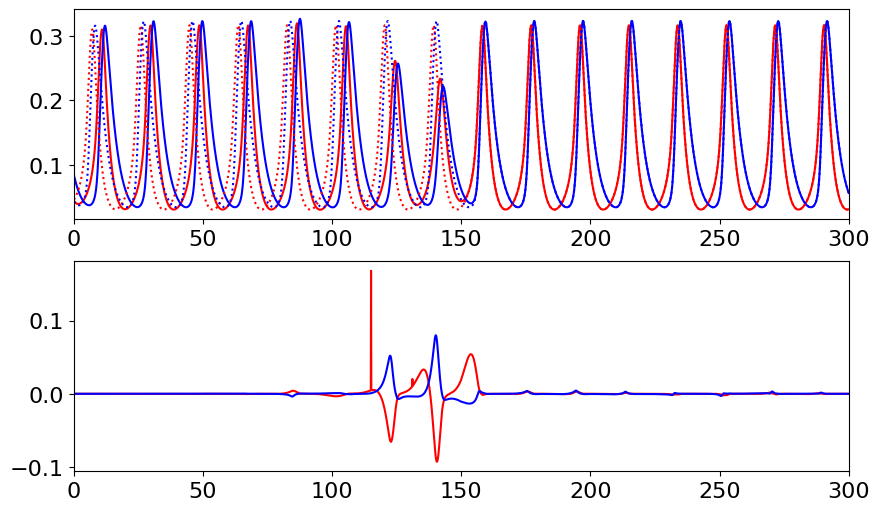

In [268]:
period_shift = 0.4 * np.pi
print("target shift in ms = ", period * period_shift/ ( 2. * np.pi))
index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
target_shift = target[:,:,index_shift:index_shift+3001]

wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=0.1, w_1 = 0., w_1T = 0.0, w_1D=0., print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)
print("-------------------- no input --------------------")
wc_controlled.step = 1e-3
wc_controlled.optimize(0)

#wc_controlled.model.run()
#peaks = scipy.signal.find_peaks(wc_controlled.model.exc[0,:])[0]
#print("peaks = ", peaks)


print("-------------------- self-designed input --------------------")

#wc_controlled.model.run()
#peaks = scipy.signal.find_peaks(wc_controlled.model.exc[0,:])[0]
#print("peaks = ", peaks)

exp_input = np.zeros((wc_controlled.control.shape))
exp_input[0,0,1151] = 10.
#exp_input[0,0,1341] = 10.

exp_input[0,0,1311] = 0.6

wc_controlled.control = exp_input.copy()
wc_controlled.update_input()

wc_controlled.step = 1e-3
wc_controlled.optimize(100)

wc_controlled.step = 1e-1
wc_controlled.zero_step_encountered = False
wc_controlled.optimize(100)

wc_controlled.step = 1e1
wc_controlled.zero_step_encountered = False
wc_controlled.optimize(1000)

wc_controlled.step = 1e3
wc_controlled.zero_step_encountered = False
wc_controlled.optimize(1000)

state = wc_controlled.get_xs()
control = wc_controlled.control

plot_single(wc_controlled.model.t, state, control, target_shift, None)
# 0.012854394199572362

Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.20893040566801227
Cost in iteration 200: 0.01116330790202251
Final cost : 0.01116330790202251
Compute control for a deterministic system
Cost in iteration 0: 0.01116330790202251
Cost in iteration 200: 0.000600291577463403
Final cost : 0.000600291577463403
Compute control for a deterministic system
Cost in iteration 0: 0.000600291577463403
Cost in iteration 200: 0.00045883389270105063
Final cost : 0.00045883389270105063
Compute control for a deterministic system
Cost in iteration 0: 0.00045883389270105063
Cost in iteration 200: 0.00044933612690395105
Cost in iteration 400: 0.0004473264581385781
Cost in iteration 600: 0.00044686455482326334
Converged in iteration 754 with cost 0.00044681200226574596
Final cost : 0.00044681200226574596
shift =  0.1  * pi
Compute control for a deterministic system
Cost in iteration

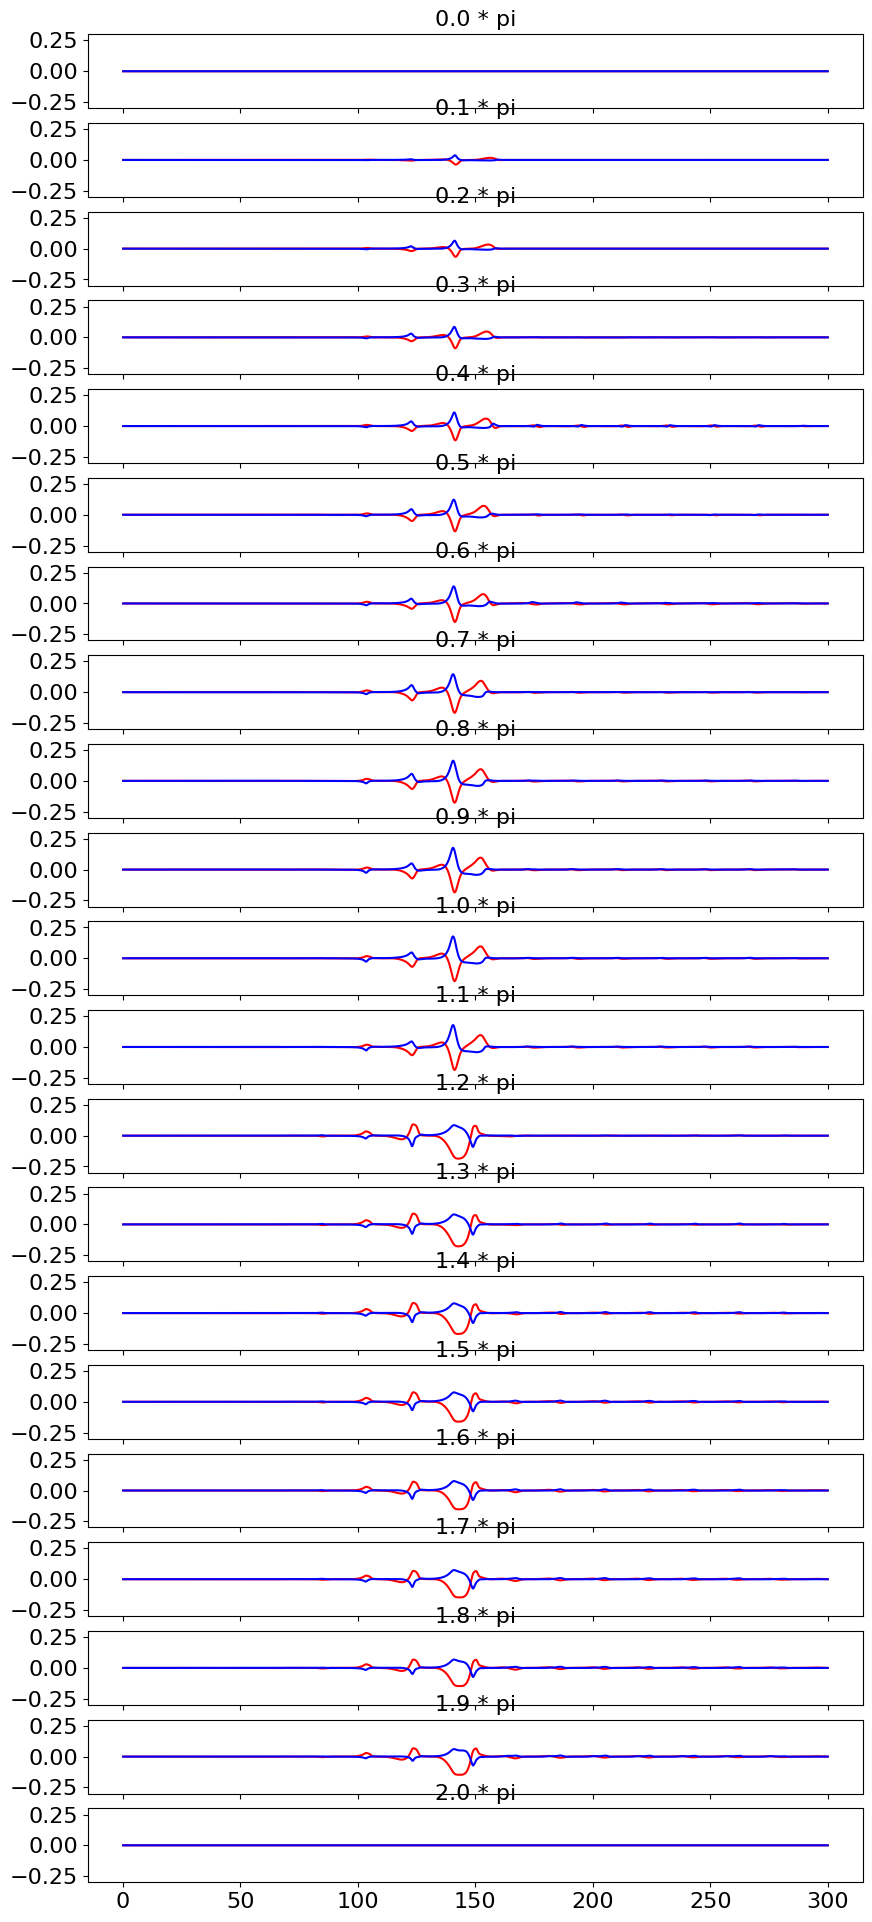

In [277]:
n_points = 21

control_array_w2_0_1 = [None] * n_points
cost = np.zeros((n_points))
w2 = 0.1

for i_shift in range(n_points):
    period_shift = i_shift* 2.* np.pi / (n_points-1)
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=w2, print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(200)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w2_0_1.append(control)
        continue

    if len(control_array_w2_0_1) > 1:
        wc_controlled.control = control_array_w2_0_1[-1].copy()
        wc_controlled.update_input()

    wc_controlled.step = 1e-2
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(1000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    print("shift = ", period_shift/np.pi , " * pi")

    #fname = "phase_shift_" + str(round(period_shift/np.pi,1)) + ".png"

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w2_0_1.append(control)

plot(control_array_w2_0_1, "phase_shift_w2_0_1.png")

Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.20893040566801227
Cost in iteration 200: 0.012626316372410781
Final cost : 0.012626316372410781
Compute control for a deterministic system
Cost in iteration 0: 0.012626316372410781
Cost in iteration 200: 0.004210532399543619
Final cost : 0.004210532399543619
Compute control for a deterministic system
Cost in iteration 0: 0.004210532399543619
Converged in iteration 72 with cost 0.004193427558706585
Final cost : 0.004193427558706585
Compute control for a deterministic system
Cost in iteration 0: 0.004193427558706585
Converged in iteration 2 with cost 0.004193427558706585
Final cost : 0.004193427558706585
shift =  0.1  * pi
Compute control for a deterministic system
Cost in iteration 0: 0.8296772107719207
Cost in iteration 200: 0.05469637300867616
Final cost : 0.05469637300867616
Compute control for a deterministi

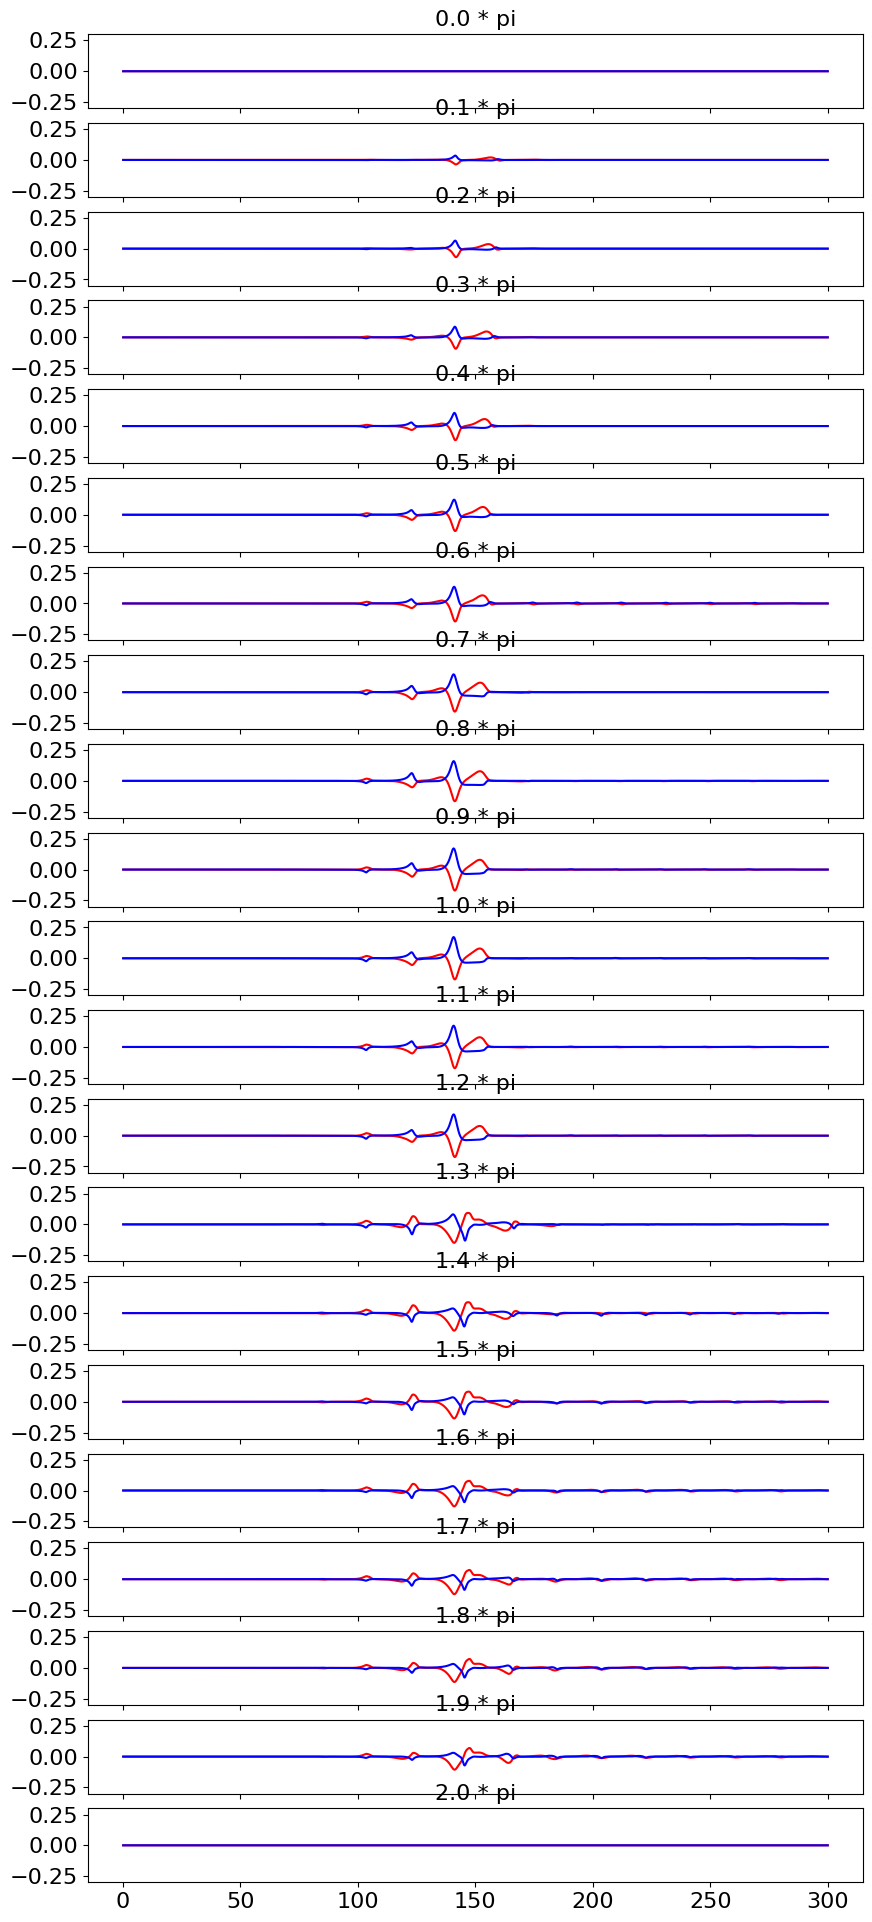

In [278]:
control_array_w2_1 = []
w2 = 1.

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 21, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=w2, print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(200)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w2_1.append(control)
        continue

    if len(control_array_w2_1) > 1:
        wc_controlled.control = control_array_w2_1[-1].copy()
        wc_controlled.update_input()

    wc_controlled.step = 1e-2
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(1000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    print("shift = ", period_shift/np.pi , " * pi")

    #fname = "phase_shift_" + str(round(period_shift/np.pi,1)) + ".png"

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w2_1.append(control)

plot(control_array_w2_1, "phase_shift_w2_1.png")

In [279]:
control_array_w2_10 = []
w2 = 10.

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 21, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=w2, print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(200)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w2_10.append(control)
        continue

    if len(control_array_w2_10) > 1:
        wc_controlled.control = control_array_w2_10[-1].copy()
        wc_controlled.update_input()

    wc_controlled.step = 1e-2
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(200)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(1000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    print("shift = ", period_shift/np.pi , " * pi")

    #fname = "phase_shift_" + str(round(period_shift/np.pi,1)) + ".png"

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w2_10.append(control)

plot(control_array_w2_10, "phase_shift_w2_10.png")

Compute control for a deterministic system
Cost in iteration 0: 0.0
Cost in iteration 200: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.20893040566801227
Cost in iteration 200: 0.030262282853958773
Final cost : 0.030262282853958773
Compute control for a deterministic system
Cost in iteration 0: 0.030262282853958773
Cost in iteration 200: 0.029577129165834524
Final cost : 0.029577129165834524
Compute control for a deterministic system
Cost in iteration 0: 0.029577129165834524
Cost in iteration 200: 0.029577129165746688
Final cost : 0.029577129165746688
Compute control for a deterministic system
Cost in iteration 0: 0.029577129165746688
Cost in iteration 200: 0.029577129165746688
Cost in iteration 400: 0.029577129165746688
Cost in iteration 600: 0.029577129165746688
Cost in iteration 800: 0.029577129165746688
Cost in iteration 1000: 0.029577129165746688
Final cost : 0.029577129165746688
shift =  0.1  * pi
Compute control for a deterministic syste

Compute control for a deterministic system
Cost in iteration 0: 0.0
Final cost : 0.0
Compute control for a deterministic system
Cost in iteration 0: 0.8296772107719207
Final cost : 0.8078615765405245
Compute control for a deterministic system
Cost in iteration 0: 0.8078615765405245
Final cost : 0.025548278327751615
Compute control for a deterministic system
Cost in iteration 0: 0.025548278327751615
Converged in iteration 9 with cost 0.02448229390739976
Final cost : 0.02448229390739976
Compute control for a deterministic system
Cost in iteration 0: 0.02448229390739976
Converged in iteration 2 with cost 0.02448229390739976
Final cost : 0.02448229390739976


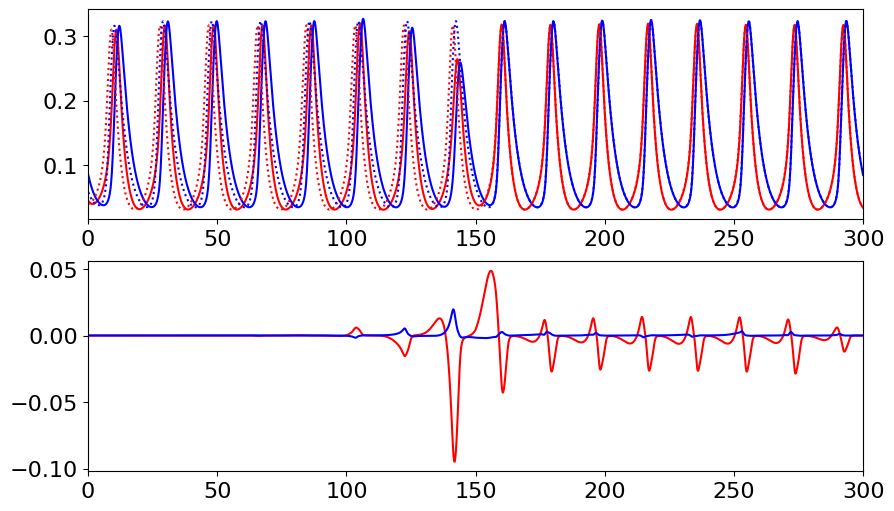

Compute control for a deterministic system
Cost in iteration 0: 2.3230079801886268
Final cost : 2.3086704911623617
Compute control for a deterministic system
Cost in iteration 0: 2.3086704911623617
Final cost : 0.06574131375260671
Compute control for a deterministic system
Cost in iteration 0: 0.06574131375260671
Final cost : 0.057144197697091434
Compute control for a deterministic system
Cost in iteration 0: 0.057144197697091434
Cost in iteration 200: 0.043367594715266265
Cost in iteration 400: 0.042701180868611806
Cost in iteration 600: 0.04261560551639527
Cost in iteration 800: 0.04259659023781068
Cost in iteration 1000: 0.04259105637320609
Final cost : 0.042588609936386405


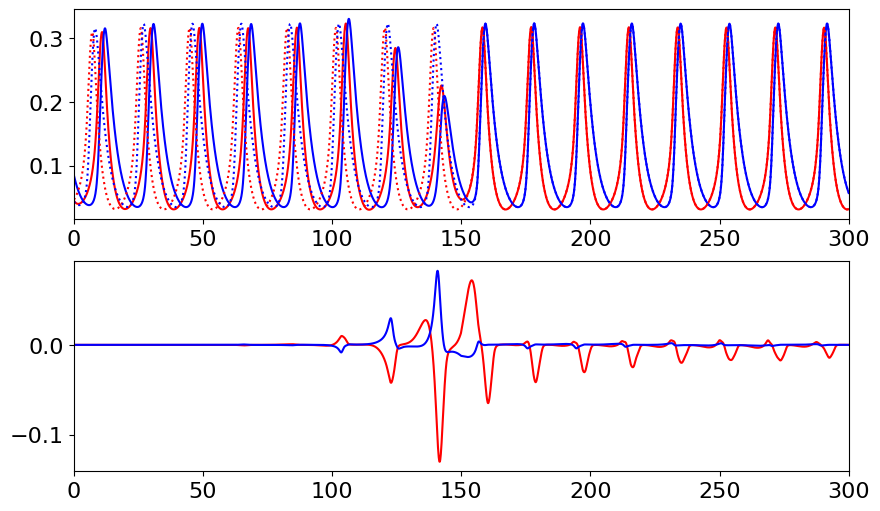

Compute control for a deterministic system
Cost in iteration 0: 3.462258009751679
Final cost : 3.4598401023788776
Compute control for a deterministic system
Cost in iteration 0: 3.4598401023788776
Final cost : 0.133000134259301
Compute control for a deterministic system
Cost in iteration 0: 0.133000134259301
Final cost : 0.12828376050388077
Compute control for a deterministic system
Cost in iteration 0: 0.12828376050388077
Cost in iteration 200: 0.10091775293341071
Cost in iteration 400: 0.07817018826612224
Cost in iteration 600: 0.06415674595872817
Cost in iteration 800: 0.05817603844490106
Cost in iteration 1000: 0.0567203368344668
Final cost : 0.05610644387957923


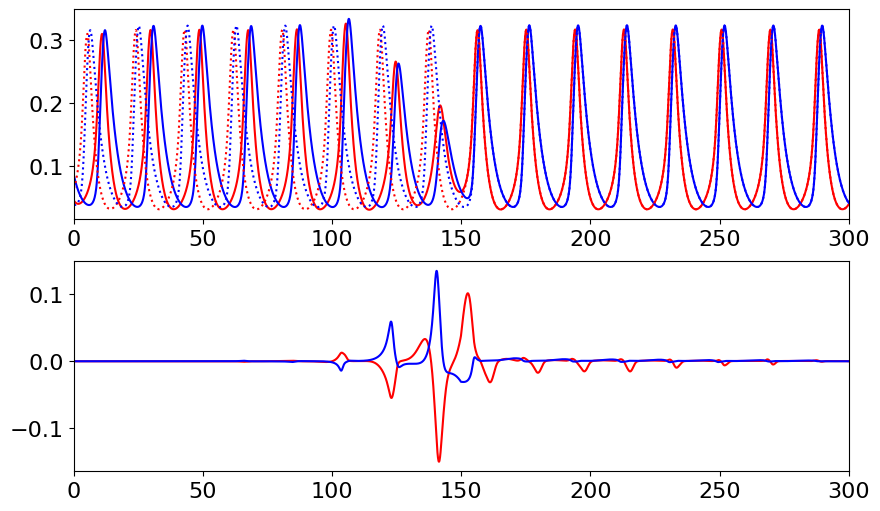

Compute control for a deterministic system
Cost in iteration 0: 4.101239046720138
Final cost : 4.100844839669859
Compute control for a deterministic system
Cost in iteration 0: 4.100844839669859
Final cost : 0.4517929166530388
Compute control for a deterministic system
Cost in iteration 0: 0.4517929166530388
Converged in iteration 8 with cost 0.29272722537200524
Final cost : 0.29272722537200524
Compute control for a deterministic system
Cost in iteration 0: 0.29272722537200524
Converged in iteration 2 with cost 0.29272722537200524
Final cost : 0.29272722537200524


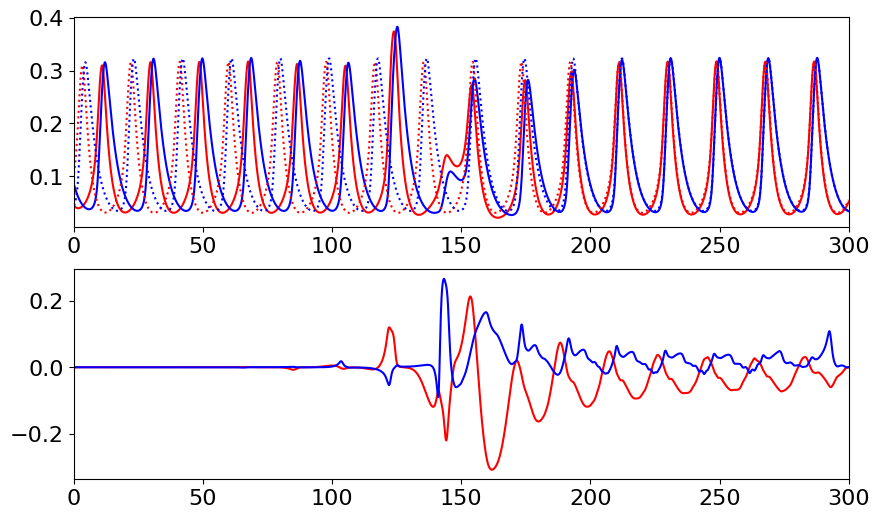

Compute control for a deterministic system
Cost in iteration 0: 4.296048960866105
Final cost : 4.295527453090679
Compute control for a deterministic system
Cost in iteration 0: 4.295527453090679
Final cost : 0.41252763462750996
Compute control for a deterministic system
Cost in iteration 0: 0.41252763462750996
Final cost : 0.4005452523443856
Compute control for a deterministic system
Cost in iteration 0: 0.4005452523443856
Cost in iteration 200: 0.37686263958130617
Cost in iteration 400: 0.35767395662145407
Cost in iteration 600: 0.3405860473214837
Cost in iteration 800: 0.31703711544558466
Cost in iteration 1000: 0.13227174384987564
Final cost : 0.08679909580757762


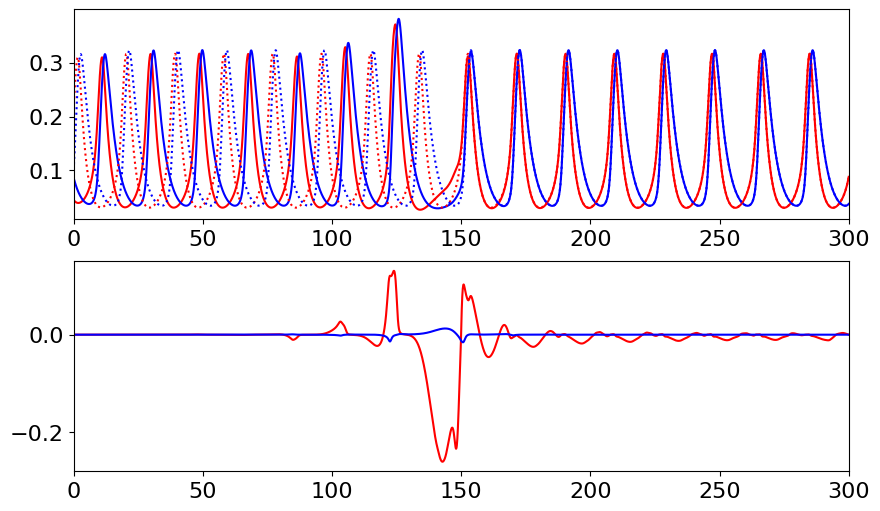

Compute control for a deterministic system
Cost in iteration 0: 4.081572511061182
Final cost : 4.0743708748134475
Compute control for a deterministic system
Cost in iteration 0: 4.0743708748134475
Final cost : 0.30660646835680005
Compute control for a deterministic system
Cost in iteration 0: 0.30660646835680005
Final cost : 0.290189278961974
Compute control for a deterministic system
Cost in iteration 0: 0.290189278961974
Cost in iteration 200: 0.25132941564620737
Cost in iteration 400: 0.22702622461601307
Cost in iteration 600: 0.20024149200474695
Cost in iteration 800: 0.17231835014822883
Cost in iteration 1000: 0.1434276060019708
Final cost : 0.07003721045714843


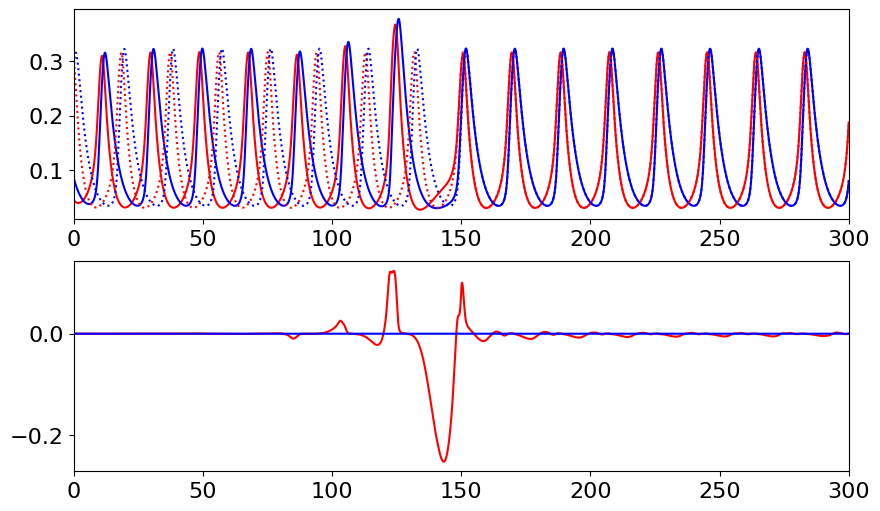

Compute control for a deterministic system
Cost in iteration 0: 3.4104091502797953
Final cost : 3.39202105550112
Compute control for a deterministic system
Cost in iteration 0: 3.39202105550112
Final cost : 0.17982331434952645
Compute control for a deterministic system
Cost in iteration 0: 0.17982331434952645
Final cost : 0.1755490893455321
Compute control for a deterministic system
Cost in iteration 0: 0.1755490893455321
Cost in iteration 200: 0.16288748378258117
Cost in iteration 400: 0.1467655505228293
Cost in iteration 600: 0.12373068164456226
Cost in iteration 800: 0.10187743138067586
Cost in iteration 1000: 0.0907530798916061
Final cost : 0.06258180047916198


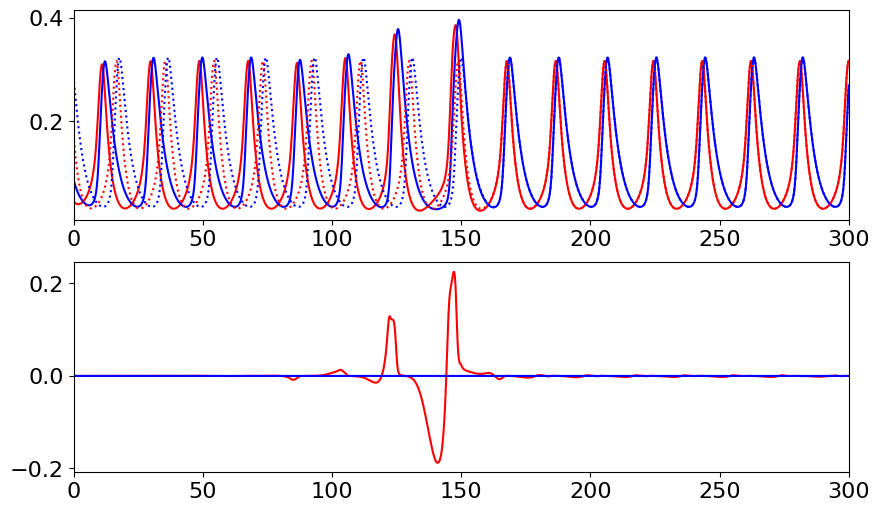

Compute control for a deterministic system
Cost in iteration 0: 2.301789098969796
Final cost : 2.268611309705373
Compute control for a deterministic system
Cost in iteration 0: 2.268611309705373
Final cost : 0.09411438119240509
Compute control for a deterministic system
Cost in iteration 0: 0.09411438119240509
Final cost : 0.09227012813084905
Compute control for a deterministic system
Cost in iteration 0: 0.09227012813084905
Cost in iteration 200: 0.0865126897131389
Cost in iteration 400: 0.07889701071893755
Cost in iteration 600: 0.0697190913141943
Cost in iteration 800: 0.06162096379130996
Cost in iteration 1000: 0.05574646047439897
Final cost : 0.0536525517677469


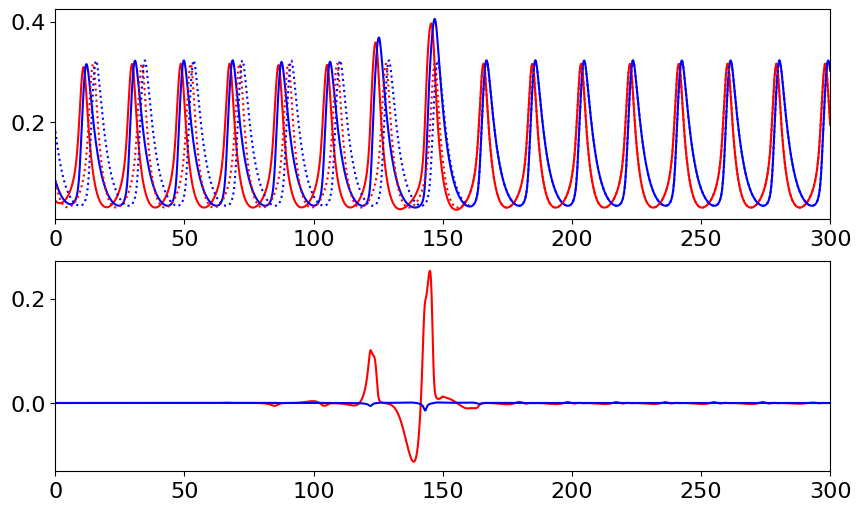

Compute control for a deterministic system
Cost in iteration 0: 0.8245562066074964
Final cost : 0.7963480224897441
Compute control for a deterministic system
Cost in iteration 0: 0.7963480224897441
Final cost : 0.034988451338910355
Compute control for a deterministic system
Cost in iteration 0: 0.034988451338910355
Final cost : 0.03358546512490718
Compute control for a deterministic system
Cost in iteration 0: 0.03358546512490718
Cost in iteration 200: 0.0297787870900676
Cost in iteration 400: 0.029568126021671474
Cost in iteration 600: 0.029568126016684203
Cost in iteration 800: 0.029568126016684203
Cost in iteration 1000: 0.029568126016684203
Final cost : 0.029568126016684203


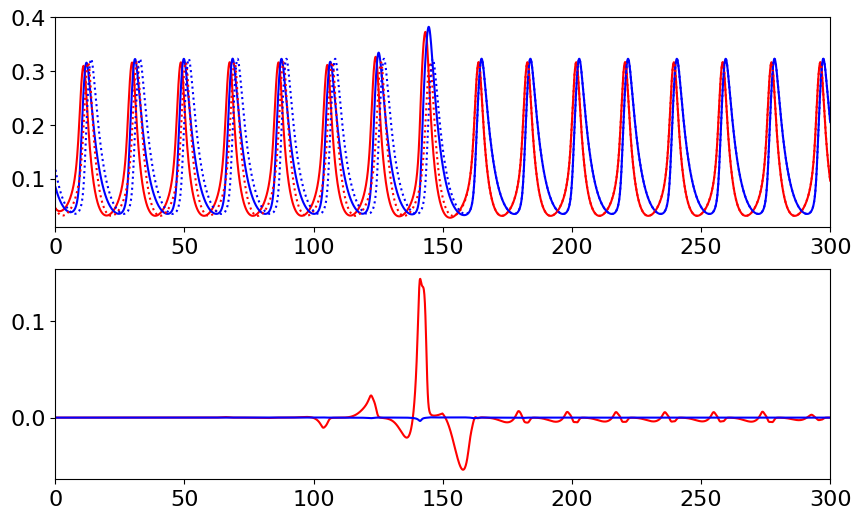

Compute control for a deterministic system
Cost in iteration 0: 4.749373705274727e-06
Final cost : 4.749373705274727e-06


In [260]:
control_array_w1D = []

w1D = 1e-1

for period_shift in np.linspace(0.*np.pi, 2.*np.pi, 11, endpoint=True):
    index_shift = np.round(period * period_shift/ ( 2. * np.pi)/ dt).astype(int)
    target_shift = target[:,:,index_shift:index_shift+3001]

    wc_controlled = oc_wc.OcWc(wc, target=target_shift, w_p=1, w_2=0., w_1D=w1D, print_array=np.arange(0,1001,200), precision_cost_interval=(int0,int1), control_matrix=control_mat, precision_matrix=prec_mat)

    wc_controlled.step = 1e-3
    wc_controlled.optimize(1)

    if period_shift in [0.*np.pi, 2.*np.pi]:
        state = wc_controlled.get_xs()
        control = wc_controlled.control
        control_array_w1D.append(control)
        continue

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(100)

    wc_controlled.step = 1e0
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(20)

    wc_controlled.step = 1e-1
    wc_controlled.zero_step_encountered = False
    wc_controlled.optimize(2000)

    state = wc_controlled.get_xs()
    control = wc_controlled.control

    #plot_single(wc_controlled.model.t, state, control, target_shift, None)
    control_array_w1D.append(control)

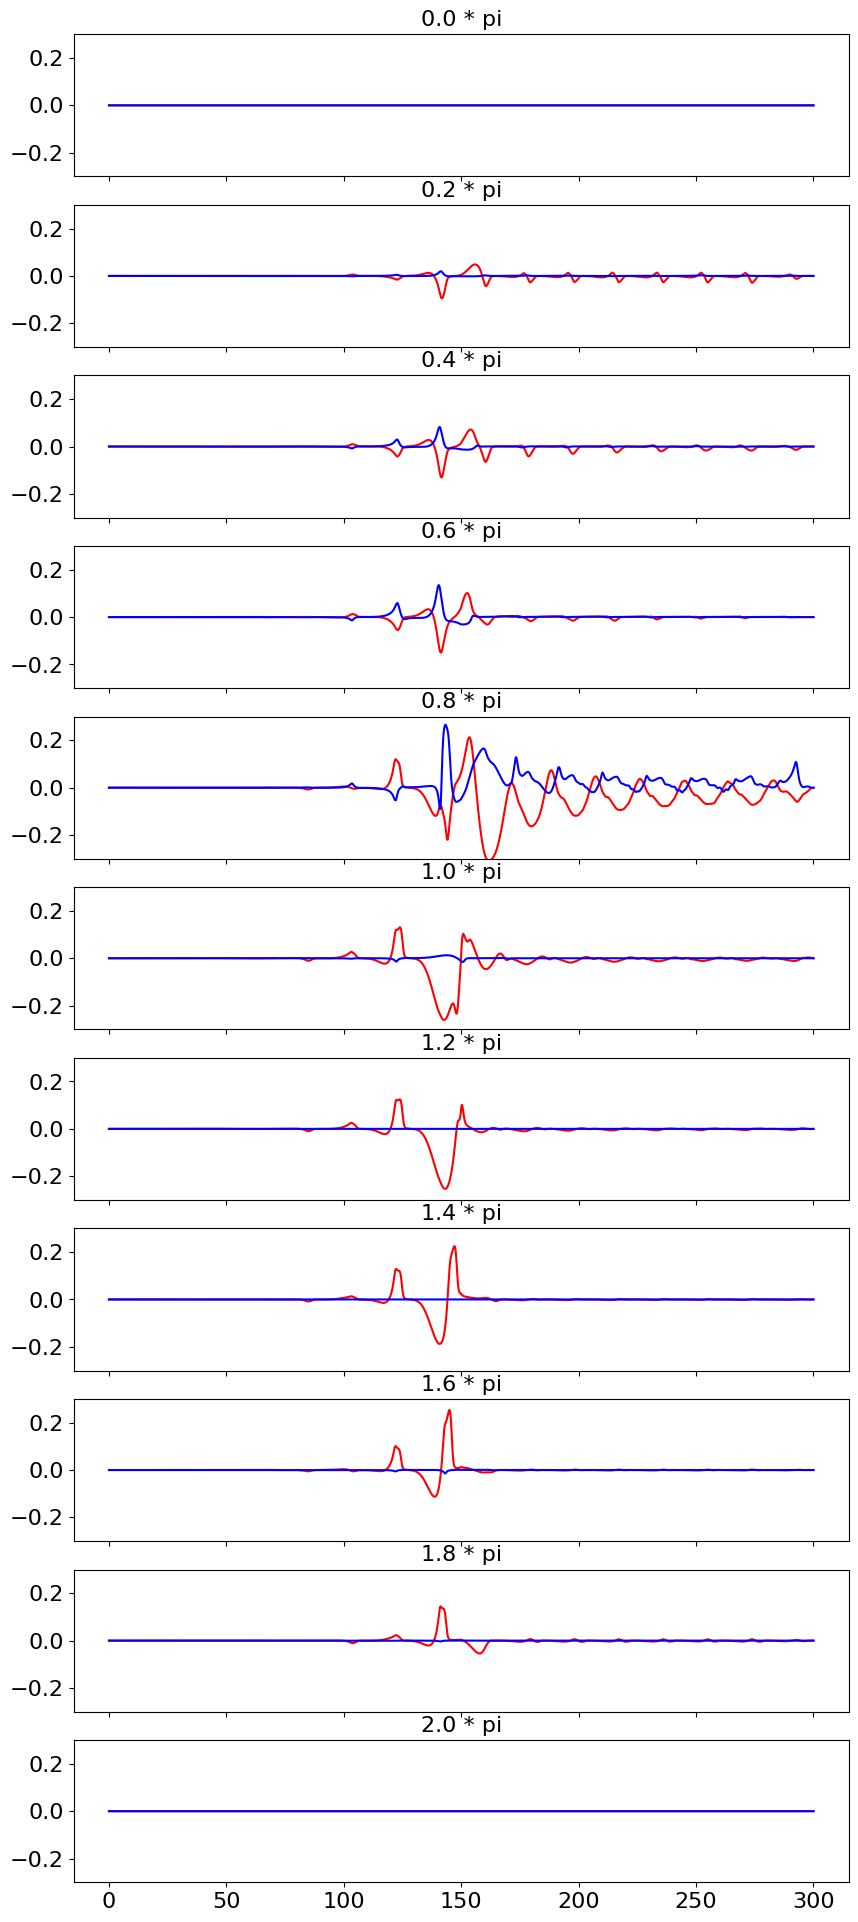

In [261]:
plot(control_array_w1D, "phase_shift_w1D_-1.png")

In [193]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.01
wc.params.dt = dt

duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
zero_control =np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]
input = zero_control.copy()

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()
de = 1e1

peaks0 = scipy.signal.find_peaks(wc.exc[0,:])[0]
print(peaks0)
period = (peaks0[-1] - peaks0[-2])*dt
print("period = ", period)

i0, i1 = 0, 0
for i in range(len(peaks0)):
    if peaks0[i] > 100/dt:
        i0 = peaks0[i]
        i1 = peaks0[i+1]
        break

ind_range = range(i0, i1+1,1)
shift_ep = np.zeros((len(ind_range)))
shift_em = np.zeros((len(ind_range)))
shift_ip = np.zeros((len(ind_range)))
shift_im = np.zeros((len(ind_range)))

for i in range(len(ind_range)):
    t = ind_range[i]

    wc.params.exc_ext[0,t] += de
    wc.run()
    wc.params.exc_ext[0,t] -= de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_ep[i] = (peaks[-1] - peaks0[-1])*dt

    wc.params.exc_ext[0,t] += -de
    wc.run()
    wc.params.exc_ext[0,t] -= -de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_em[i] = (peaks[-1] - peaks0[-1])*dt
    wc.params.inh_ext[0,t] += de
    wc.run()
    wc.params.inh_ext[0,t] -= de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_ip[i] = (peaks[-1] - peaks0[-1])*dt

    wc.params.inh_ext[0,t] += -de
    wc.run()
    wc.params.inh_ext[0,t] -= -de

    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    shift_im[i] = (peaks[-1] - peaks0[-1])*dt

[ 1079  2916  4761  6606  8452 10297 12142 13988 15833 17678 19524 21369
 23214 25060 26905 28751]
period =  18.46


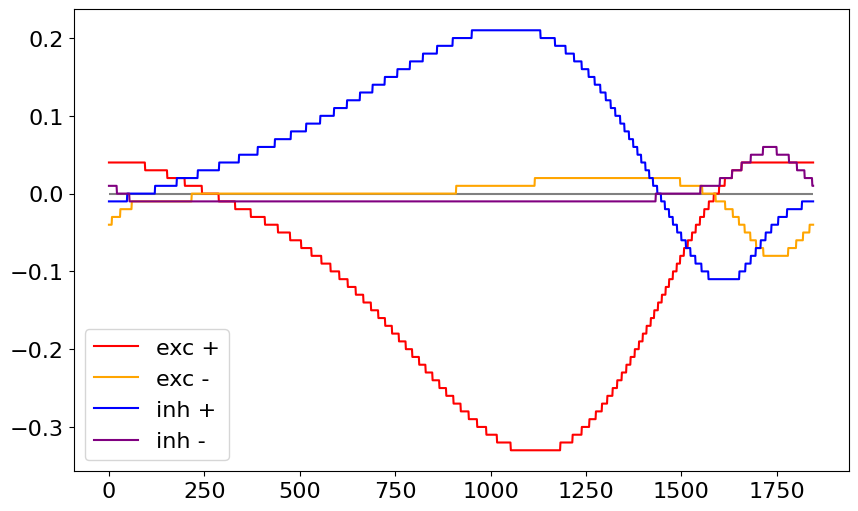

In [194]:
plt.plot(range(0,len(ind_range)), shift_ep, color="red", label="exc +")
plt.plot(range(0,len(ind_range)), shift_em, color="orange", label="exc -")
plt.plot(range(0,len(ind_range)), shift_ip, color="blue", label="inh +")
plt.plot(range(0,len(ind_range)), shift_im, color="purple", label="inh -")

plt.hlines(0., 0,len(ind_range), color="grey")
plt.legend(loc="lower left")
plt.show()